## Data cleaning

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv('Datasets/rate_content_clean.csv')
df.head(3)
df.shape

(976, 6)

Drop unnamed columns and fill in empty spaces

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.shape

(976, 6)

In [4]:
df.fillna('')
df.shape

(976, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Version          976 non-null    object
 1   Topic URL        976 non-null    object
 2   Helpful?         976 non-null    object
 3   Language         976 non-null    object
 4   Message          110 non-null    object
 5   Date of comment  976 non-null    object
dtypes: object(6)
memory usage: 45.9+ KB


In [6]:
df = df.applymap(str)

In [7]:
df.head()

,Version,Topic URL,Helpful?,Language,Message,Date of comment
0,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"22 October, 2021"
1,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"9 November, 2021"
2,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"7 December, 2021"
3,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,nan,"25 December, 2021"
4,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"8 September, 2021"


### Remove all duplicates except where message is empty

To avoid discounting two diff users leaving two thumbs up both with no message

In [8]:
df = df[~df.duplicated(['Message'], keep='first') | df['Message'].eq('nan')]

## Ratio of helpfulness

In [9]:
test_df = df[["Topic URL", "Helpful?"]].groupby(by=["Helpful?"]).count()

In [10]:
test_df

,Topic URL
Helpful?,
No,480
Yes,479


In [11]:
total_helpful = df.count()['Helpful?']
perc = df[df['Helpful?']=='Yes'].count()['Helpful?'] / total_helpful

print("The percentage of total helpful votes is " + str(perc*100) + '%')

The percentage of total helpful votes is 49.94786235662148%


## Visualize

<function matplotlib.pyplot.show(close=None, block=None)>

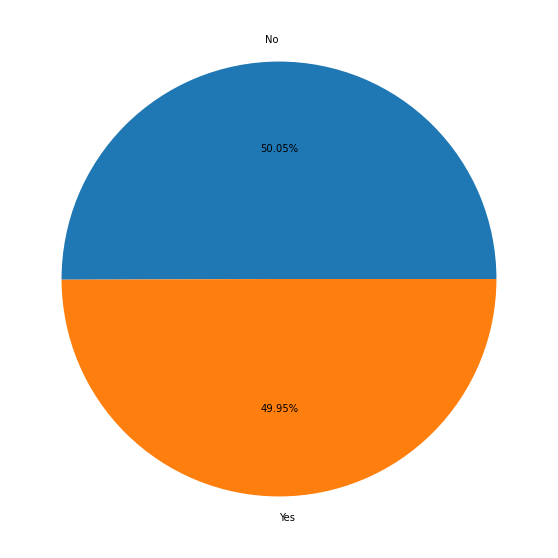

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(11,10))

plt.pie(test_df["Topic URL"],labels=["No", "Yes"], autopct='%.2f%%')
plt.show

#### Create a dict to track helpful votes for each page

In [13]:
helpful_pages = {}

helpful_ratio = {}

In [14]:
for i in df['Topic URL']:
    helpful_pages.update({i:0})
    helpful_ratio.update({i:0})

### Number of 'helpful' vote per page

In [15]:
for i in helpful_pages:
    helpful_pages.update({i:(df.loc[(df['Topic URL']==i) & (df['Helpful?']=='Yes')].count()['Helpful?'])})

In [16]:
data_items = helpful_pages.items()

data_list = list(data_items)


n_df = pd.DataFrame(data_list)

In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
n_df.head(10)

,0,1
0,SSQNUZ_3.5.0,23
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1
5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,1
6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,1
7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,1
8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,1
9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,0


### Number of 'non-helpful' vote per page

In [18]:
for i in helpful_pages:
    helpful_pages.update({i:(df.loc[(df['Topic URL']==i) & (df['Helpful?']=='No')].count()['Helpful?'])})
    
data_items = helpful_pages.items()

data_list = list(data_items)


n_df2 = pd.DataFrame(data_list)

In [19]:
n_df2.head(10)

,0,1
0,SSQNUZ_3.5.0,15
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,2
3,SSQNUZ_3.5.0/cpd/admin/administer.html,0
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,0
5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,0
6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,0
7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,0
8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,3
9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,1


### Ratio of 'helpful' vote per page

In [20]:
for i in helpful_ratio:
    r = (df.loc[(df['Topic URL']==i) & (df['Helpful?']=='Yes')].count()['Helpful?']) / (df.loc[(df['Topic URL']==i)].count()['Helpful?'])
    helpful_ratio.update({i:r})

In [21]:
data_items = helpful_ratio.items()

data_list = list(data_items)


ratio_df = pd.DataFrame(data_list)

In [22]:
ratio_df[2] = ratio_df[1].apply(lambda x: str(x*100) + '%')

### View the percentage of helpfulness per page

In [23]:
ratio_df.head(10)

,0,1,2
0,SSQNUZ_3.5.0,0.605263,60.526315789473685%
1,SSQNUZ_3.5.0/cpd/access/access-data.html,0.500000,50.0%
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0.000000,0.0%
3,SSQNUZ_3.5.0/cpd/admin/administer.html,1.000000,100.0%
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1.000000,100.0%
5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,1.000000,100.0%
6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,1.000000,100.0%
7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,1.000000,100.0%
8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,0.250000,25.0%
9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,0.000000,0.0%


### Merge the absolute helpful votes and the ratio

In [24]:
helpful_df = pd.merge(n_df, n_df2, how="left", on=0)

In [25]:
helpful_df = pd.merge(helpful_df, ratio_df, how="left", on=0)

In [26]:
helpful_df.head()

,0,1_x,1_y,1,2
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1,1,0.500000,50.0%
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0,2,0.000000,0.0%
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.000000,100.0%
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1,0,1.000000,100.0%


In [27]:
helpful_df = helpful_df.rename(columns={0: "Topic URL", "1_y": "Non-helpful votes", "1_x": "Helpful votes", 1:"Numerical percentage", 2: "Percentage of helpful votes"})

Add a total vote column

In [28]:
h_df = helpful_df
h_df["Total"] = h_df["Helpful votes"] + h_df["Non-helpful votes"]

In [29]:
h_df

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1,1,0.500000,50.0%,2
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0,2,0.000000,0.0%,2
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.000000,100.0%,6
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1,0,1.000000,100.0%,1
5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,1,0,1.000000,100.0%,1
6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,1,0,1.000000,100.0%,1
7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,1,0,1.000000,100.0%,1
8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,1,3,0.250000,25.0%,4
9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,0,1,0.000000,0.0%,1


Let's look at the current ratio of helpfulness vs non-helpfuness for each page

In [30]:
x = df['Topic URL'].value_counts()

In [31]:
df['sec_col_top'] = df['Topic URL'].map(x)

In [32]:
df.head()

,Version,Topic URL,Helpful?,Language,Message,Date of comment,sec_col_top
0,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"22 October, 2021",38
1,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"9 November, 2021",38
2,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"7 December, 2021",38
3,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,nan,"25 December, 2021",38
4,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"8 September, 2021",38


In [33]:
def other_topic(a):
    if a["sec_col_top"] <= 8:
        return "Other Topic"
    else:
        return a["Topic URL"]

In [34]:
df["Other Topic"] = df.apply(other_topic, axis=1)

In [35]:
df.head(10)

,Version,Topic URL,Helpful?,Language,Message,Date of comment,sec_col_top,Other Topic
0,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"22 October, 2021",38,SSQNUZ_3.5.0
1,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"9 November, 2021",38,SSQNUZ_3.5.0
2,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"7 December, 2021",38,SSQNUZ_3.5.0
3,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,nan,"25 December, 2021",38,SSQNUZ_3.5.0
4,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"8 September, 2021",38,SSQNUZ_3.5.0
5,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"22 October, 2021",38,SSQNUZ_3.5.0
6,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,nan,"22 December, 2021",38,SSQNUZ_3.5.0
7,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,nan,"3 January, 2022",38,SSQNUZ_3.5.0
8,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,nan,"25 December, 2021",38,SSQNUZ_3.5.0
9,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,cs,nan,"22 October, 2021",38,SSQNUZ_3.5.0


### Percentage of topic votes

<function matplotlib.pyplot.show(close=None, block=None)>

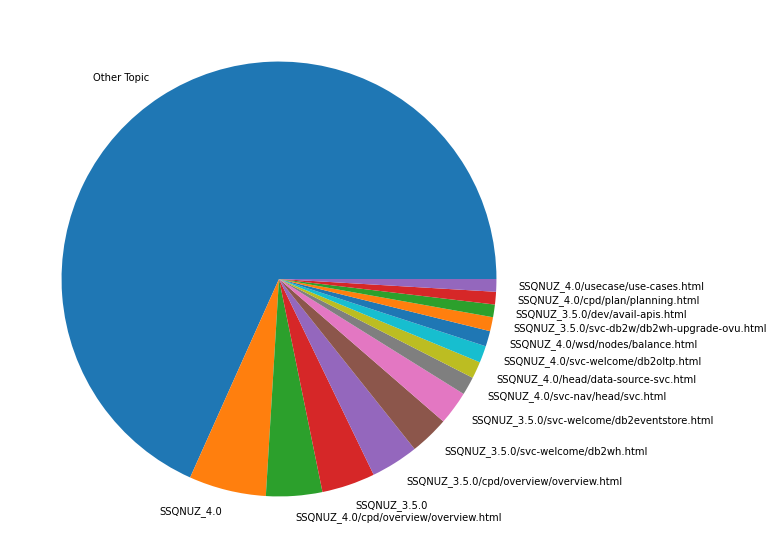

In [36]:
plt.figure(figsize=(11,10))

plt.pie(df["Other Topic"].value_counts(), labels=df["Other Topic"].value_counts().index)
plt.show

### Sort by pages with the most helpful votes

In [37]:
h_df_most_votes = h_df.sort_values(

   by="Helpful votes",

    ascending=False
)

h_df_most_votes.head(10)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
143,SSQNUZ_4.0/cpd/overview/overview.html,28,12,0.700000,70.0%,40
15,SSQNUZ_3.5.0/cpd/overview/overview.html,27,7,0.794118,79.41176470588235%,34
121,SSQNUZ_4.0,26,29,0.472727,47.27272727272727%,55
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38
80,SSQNUZ_3.5.0/svc-welcome/db2wh.html,14,14,0.500000,50.0%,28
78,SSQNUZ_3.5.0/svc-welcome/db2eventstore.html,12,12,0.500000,50.0%,24
195,SSQNUZ_4.0/svc-nav/head/svc.html,9,4,0.692308,69.23076923076923%,13
221,SSQNUZ_4.0/usecase/use-cases.html,7,2,0.777778,77.77777777777779%,9
40,SSQNUZ_3.5.0/svc-db2w/db2wh-upgrade-ovu.html,6,4,0.600000,60.0%,10
149,SSQNUZ_4.0/cpd/plan/planning.html,6,3,0.666667,66.66666666666666%,9


### Sort by pages with the most non-helpful votes

In [38]:
h_df.sort_values(

   by="Non-helpful votes",

    ascending=False
)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
121,SSQNUZ_4.0,26,29,0.472727,47.27272727272727%,55
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38
80,SSQNUZ_3.5.0/svc-welcome/db2wh.html,14,14,0.500000,50.0%,28
143,SSQNUZ_4.0/cpd/overview/overview.html,28,12,0.700000,70.0%,40
78,SSQNUZ_3.5.0/svc-welcome/db2eventstore.html,12,12,0.500000,50.0%,24
227,SSQNUZ_4.0/wsd/nodes/balance.html,0,11,0.000000,0.0%,11
204,SSQNUZ_4.0/svc-welcome/db2oltp.html,5,7,0.416667,41.66666666666667%,12
15,SSQNUZ_3.5.0/cpd/overview/overview.html,27,7,0.794118,79.41176470588235%,34
167,SSQNUZ_4.0/head/data-source-svc.html,6,6,0.500000,50.0%,12
271,SSQNUZ_4.0/wsj/getting-started/projects.html,0,6,0.000000,0.0%,6


### Percentage

In [39]:
h_df.sort_values(

   by="Numerical percentage",

    ascending=False
)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
259,SSQNUZ_4.0/wsj/analyze-data/ml-manage-assets.html,1,0,1.000000,100.0%,1
131,SSQNUZ_4.0/cpd/install/cpd-profile-mgmt.html,1,0,1.000000,100.0%,1
91,SSQNUZ_3.5.0/svc-welcome/watsondisc.html,1,0,1.000000,100.0%,1
242,SSQNUZ_4.0/wsd/spss-modeler.html,1,0,1.000000,100.0%,1
151,SSQNUZ_4.0/cpd/plan/security.html,1,0,1.000000,100.0%,1
103,SSQNUZ_3.5.0/wsj/analyze-data/ml-spaces_local....,1,0,1.000000,100.0%,1
59,SSQNUZ_3.5.0/svc-nav/head/enterprise-gov.html,1,0,1.000000,100.0%,1
200,SSQNUZ_4.0/svc-voice/voice.html,4,0,1.000000,100.0%,4
127,SSQNUZ_4.0/cpd/admin/roles-permissions.html,1,0,1.000000,100.0%,1
155,SSQNUZ_4.0/cpd/upgrade/upgrade-v3-cpd.html,1,0,1.000000,100.0%,1


We can choose to take out all pages with 1 vote only to let the most substantially rated topics to the top (a single vote will cast a page as either 100% or 0% positive)

### Most helpful pages

In [40]:
sub_h_df = h_df_most_votes[h_df_most_votes["Total"]>=2]
sub_h_df = sub_h_df.sort_values(by=["Numerical percentage","Total"], ascending=False)
sub_h_df.head(10)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.0,100.0%,6
230,SSQNUZ_4.0/wsd/nodes/chaid.html,5,0,1.0,100.0%,5
301,SSQNUZ_4.0/wsj/spark/spark-syntax-parms-errors...,5,0,1.0,100.0%,5
27,SSQNUZ_3.5.0/svc-db2/hostpath-selinux-aese.html,4,0,1.0,100.0%,4
140,SSQNUZ_4.0/cpd/install/preinstall-obtain-prere...,4,0,1.0,100.0%,4
11,SSQNUZ_3.5.0/cpd/install/install.html,4,0,1.0,100.0%,4
200,SSQNUZ_4.0/svc-voice/voice.html,4,0,1.0,100.0%,4
101,SSQNUZ_3.5.0/wsj/analyze-data/ml-experimnt-bui...,3,0,1.0,100.0%,3
110,SSQNUZ_3.5.0/wsj/governance/metadata-prepare.html,3,0,1.0,100.0%,3
299,SSQNUZ_4.0/wsj/spark/spark-interactive-app.html,3,0,1.0,100.0%,3


### Least helpful pages

In [41]:
sub_h_df.sort_values(

   by=["Numerical percentage","Total"],

    ascending=True
)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
232,SSQNUZ_4.0/wsd/nodes/expressionbuilder.html,0,2,0.000000,0.0%,2
279,SSQNUZ_4.0/wsj/governance/metadata-connection-...,0,2,0.000000,0.0%,2
282,SSQNUZ_4.0/wsj/install/install-ws.html,0,2,0.000000,0.0%,2
285,SSQNUZ_4.0/wsj/manage-data/conn-hive.html,0,2,0.000000,0.0%,2
250,SSQNUZ_4.0/wsj/analyze-data/fl-tf2-tutorial.html,0,2,0.000000,0.0%,2
256,SSQNUZ_4.0/wsj/analyze-data/migrate-projlib-py...,0,2,0.000000,0.0%,2
153,SSQNUZ_4.0/cpd/troubleshoot/troubleshooting-in...,0,2,0.000000,0.0%,2
105,SSQNUZ_3.5.0/wsj/getting-started/profile.html,0,2,0.000000,0.0%,2
113,SSQNUZ_3.5.0/wsj/manage-data/conn-teradata.html,0,2,0.000000,0.0%,2
70,SSQNUZ_3.5.0/svc-speech/speech-to-text-install...,0,2,0.000000,0.0%,2


## Most total votes

In [42]:
h_df.reset_index()

,index,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
0,0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38
1,1,SSQNUZ_3.5.0/cpd/access/access-data.html,1,1,0.500000,50.0%,2
2,2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0,2,0.000000,0.0%,2
3,3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.000000,100.0%,6
4,4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1,0,1.000000,100.0%,1
5,5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,1,0,1.000000,100.0%,1
6,6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,1,0,1.000000,100.0%,1
7,7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,1,0,1.000000,100.0%,1
8,8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,1,3,0.250000,25.0%,4
9,9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,0,1,0.000000,0.0%,1


In [43]:
h_df.sort_values(

   by="Total",

    ascending=False
)

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total
121,SSQNUZ_4.0,26,29,0.472727,47.27272727272727%,55
143,SSQNUZ_4.0/cpd/overview/overview.html,28,12,0.700000,70.0%,40
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38
15,SSQNUZ_3.5.0/cpd/overview/overview.html,27,7,0.794118,79.41176470588235%,34
80,SSQNUZ_3.5.0/svc-welcome/db2wh.html,14,14,0.500000,50.0%,28
78,SSQNUZ_3.5.0/svc-welcome/db2eventstore.html,12,12,0.500000,50.0%,24
195,SSQNUZ_4.0/svc-nav/head/svc.html,9,4,0.692308,69.23076923076923%,13
167,SSQNUZ_4.0/head/data-source-svc.html,6,6,0.500000,50.0%,12
204,SSQNUZ_4.0/svc-welcome/db2oltp.html,5,7,0.416667,41.66666666666667%,12
227,SSQNUZ_4.0/wsd/nodes/balance.html,0,11,0.000000,0.0%,11


In [44]:
num_comments = {}
msg_comments = {}

for i in df['Topic URL']:
    num_comments.update({i:0})
    msg_comments.update({i:''})

In [45]:
for i in num_comments:
    num_comments.update({i:(df.loc[(df['Topic URL']==i) & (df['Message']!='nan')].count()['Message'])})
    
data_items = num_comments.items()

data_list = list(data_items)


c_df2 = pd.DataFrame(data_list)

In [46]:
c_df2

,0,1
0,SSQNUZ_3.5.0,2
1,SSQNUZ_3.5.0/cpd/access/access-data.html,0
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,1
3,SSQNUZ_3.5.0/cpd/admin/administer.html,0
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,0
5,SSQNUZ_3.5.0/cpd/admin/remove-admin.html,0
6,SSQNUZ_3.5.0/cpd/admin/scaling-svcs.html,0
7,SSQNUZ_3.5.0/cpd/get-started/data-request.html,0
8,SSQNUZ_3.5.0/cpd/get-started/get-started.html,1
9,SSQNUZ_3.5.0/cpd/install/cpd-operator-connecte...,1


In [47]:
c_df2 = c_df2.rename(columns={0: "Topic URL", 1: "Number of comments"})

In [48]:
h_df = pd.merge(h_df, c_df2, how="right", on="Topic URL")

In [49]:
h_df.head()

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total,Number of comments
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38,2
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1,1,0.500000,50.0%,2,0
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0,2,0.000000,0.0%,2,1
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.000000,100.0%,6,0
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1,0,1.000000,100.0%,1,0


In [50]:
for i in msg_comments:
    msg_bundle = df[(df['Topic URL']==i) & (df['Message']!='nan')]['Message']
    msg_arr = []
    for j in msg_bundle:
        msg_arr.append(j)
    if msg_arr != []:
        msg_comments.update({i:msg_arr})
    
data_items = msg_comments.items()

data_list = list(data_items)


c_df1 = pd.DataFrame(data_list)

In [51]:
c_df1 = c_df1.rename(columns={0: "Topic URL", 1: "Message of comments"})

In [52]:
h_df = pd.merge(h_df, c_df1, how="right", on="Topic URL")

In [53]:
h_df.head()

,Topic URL,Helpful votes,Non-helpful votes,Numerical percentage,Percentage of helpful votes,Total,Number of comments,Message of comments
0,SSQNUZ_3.5.0,23,15,0.605263,60.526315789473685%,38,2,"[test1, you didn't show how I can get a file f..."
1,SSQNUZ_3.5.0/cpd/access/access-data.html,1,1,0.500000,50.0%,2,0,
2,SSQNUZ_3.5.0/cpd/access/t_fulfill_data_req.html,0,2,0.000000,0.0%,2,1,[What is going on 'Delivery' and user's 'Accep...
3,SSQNUZ_3.5.0/cpd/admin/administer.html,6,0,1.000000,100.0%,6,0,
4,SSQNUZ_3.5.0/cpd/admin/gather_diagnostics.html,1,0,1.000000,100.0%,1,0,


In [54]:
h_df = h_df.sort_values(

   by="Total",

    ascending=False
)

In [55]:
h_df.to_csv('Analyze-Customer-Reviews-2021-2022-3.5-and-4.0.csv', index=False)

In [56]:
ls

Analyze Customer Reviews May2.ipynb
Analyze-Customer-Reviews-2021-2022-3.5-and-4.0.csv
Datasets/
Notebook_List.xlsx
readme.md
rem_dup.py*
rem_rows.py*
test_pandas.py*


In [57]:
df = df.replace('nan', 'N/A')

In [58]:
test = df[(df['Topic URL']=='SSQNUZ_4.0/cpd/overview/overview.html') & (df['Message']!='N/A')]['Message']

for i in test:
    print(i)
    print("="*30)

Not clearly explained purpose of the service, a lot of buzzwords were used which tries to trick the reader ant not really to explain what the service is really about. As a software engineer I am very disappointed from this mediocre work
Wieso ist der Inhalt nicht auf Deutsch verfügbar?
Very good structured and understandible. 


In [59]:
df.head()

,Version,Topic URL,Helpful?,Language,Message,Date of comment,sec_col_top,Other Topic
0,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,N/A,"22 October, 2021",38,SSQNUZ_3.5.0
1,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,N/A,"9 November, 2021",38,SSQNUZ_3.5.0
2,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,N/A,"7 December, 2021",38,SSQNUZ_3.5.0
3,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,No,en,N/A,"25 December, 2021",38,SSQNUZ_3.5.0
4,IBM Cloud Pak for Data 3.5.0,SSQNUZ_3.5.0,Yes,en,N/A,"8 September, 2021",38,SSQNUZ_3.5.0
